In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Observations préliminaires


### Atténuation

In [46]:
# means are pre-calculated by oscilloscope through the AVERAGE option in AQUISITION
# std is calculated with the formula given in the electronics handbook

L = 50 # length of coaxial cable (m)

Vi_0_mean = 1.95
Vi_L_mean = 2.02

Vi_0_std = 0.01
Vi_L_std = 0.01

alpha_mean = np.log(Vi_0_mean/Vi_L_mean)/L#np.log(Vi_0_mean/Vi_L_mean) - L 

alpha_std = np.sqrt((Vi_0_std/Vi_0_mean)**2 + (Vi_L_std/Vi_L_mean)**2)/L


print(f"Attenuation coefficient : {alpha_mean:.3} ± {alpha_std:.3} m/s")

Attenuation coefficient : -0.000705 ± 0.000143 m/s


### Célérité

In [23]:
L = 50 # length of coaxial cable (m)

#t1 = np.array([0]) # times wave is send from GBF (s)
#t2 = np.array([0]) # times wave arrives at x=L length (s)

#tau_exp = t2 - t1

#tau_mean = np.mean(tau_exp)
#tau_std = np.std(tau_exp)
tau_mean = 253e-9
tau_std = 0.5e-9

c_mean = L/tau_mean
c_std = (c_mean/tau_mean) * tau_std

print(f"Wave speed : {c_mean:.5} ± {c_std:.5} m/s")

Wave speed : 1.9763e+08 ± 3.9057e+05 m/s


### Effet de l’impédance terminale

     Z  Vi(0)_mean  Vr(0)_mean
0   69        1.91       0.954
1  500        1.91       0.726
2  250        1.91       0.726
3   50        1.91       0.528
4    0        1.91       0.484
[[6.90e+01 5.00e+02 2.50e+02 5.00e+01 0.00e+00]
 [1.91e+00 1.91e+00 1.91e+00 1.91e+00 1.91e+00]
 [9.54e-01 7.26e-01 7.26e-01 5.28e-01 4.84e-01]]
[1.01593071 0.77312966 0.77312966 0.56227612 0.51541977]


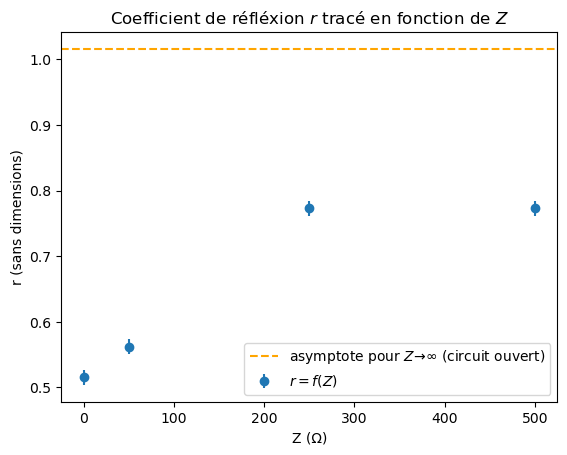

In [42]:
L = 50 # length of coaxial cable (m)

alpha_correcte = 7.1e-3
alpha_correcte_std = 6e-3

data = pd.read_csv("Z_data.csv")
print(data)

np_data = data.to_numpy().transpose()
print(np_data)

Z_list = np_data[0]
Vi_mean_list = np_data[1]
#Vi_std_list = np_data[2]
Vr_mean_list = np_data[2]
#Vr_std_list = np_data[4]

# skip first element, which should be horizontal asymptote
#r_mean_list = np.zeros(len(Z_list)-1)
#r_std_list = np.zeros(len(Z_list)-1)




r_mean_list = Vr_mean_list/Vi_mean_list * np.exp(2*alpha_correcte*L)

V_std = 0.022
r_std_list = np.sqrt((V_std/Vi_mean_list)**2, (V_std/Vr_mean_list)**2)
#for i in range(len(r_mean_list)):
#    index = i+1
#
#    r_mean_list = Vr_mean_list[index]/Vi_mean_list[index] * np.exp(2*alpha_mean*L)

print(r_mean_list)

plt.errorbar(Z_list[1:], r_mean_list[1:], label="$r=f(Z)$", yerr=r_std_list[1:], fmt="o")
#plt.ylim(-0.005, 0.005)
#plt.title("")
plt.axhline(r_mean_list[0], linestyle="dashed", label=r"asymptote pour $Z\to\infty$ (circuit ouvert)", color="orange")

plt.xlabel("Z (Ω)")
plt.ylabel("r (sans dimensions)")

plt.title("Coefficient de réfléxion $r$ tracé en fonction de $Z$")

plt.legend()
plt.savefig("plot.png", dpi=300)
plt.show()



